<a href="https://colab.research.google.com/github/CodeByNyto/telecomx_latam/blob/main/TelecomX_LATAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Telecom X**

## 📚 **Bibliotecas**

In [55]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

### **Extracción de Datos**

In [56]:
url = ('https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json')

response = requests.get(url)
data = response.json()
#Descargando datos
df = pd.read_json(url)
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [57]:
df = pd.json_normalize(data)
df

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


## ✅ **Comprobación de incoherencias en los datos**

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

### **Verificando valores únicos**

In [59]:
for col in df.columns:
  print(f'Valores unicos en la columna {col}: {df[col].nunique()}')

  if df[col].nunique() < 50:
    print(df[col].unique())
    print('-' * 25)

Valores unicos en la columna customerID: 7267
Valores unicos en la columna Churn: 3
['No' 'Yes' '']
-------------------------
Valores unicos en la columna customer.gender: 2
['Female' 'Male']
-------------------------
Valores unicos en la columna customer.SeniorCitizen: 2
[0 1]
-------------------------
Valores unicos en la columna customer.Partner: 2
['Yes' 'No']
-------------------------
Valores unicos en la columna customer.Dependents: 2
['Yes' 'No']
-------------------------
Valores unicos en la columna customer.tenure: 73
Valores unicos en la columna phone.PhoneService: 2
['Yes' 'No']
-------------------------
Valores unicos en la columna phone.MultipleLines: 3
['No' 'Yes' 'No phone service']
-------------------------
Valores unicos en la columna internet.InternetService: 3
['DSL' 'Fiber optic' 'No']
-------------------------
Valores unicos en la columna internet.OnlineSecurity: 3
['No' 'Yes' 'No internet service']
-------------------------
Valores unicos en la columna internet.On

### **Verificando valores nulos**

In [60]:
df.isnull().sum()

,0
customerID,0
Churn,0
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


### **Verificando espacios vacios o en blanco**

In [61]:
df.apply(lambda x:x.astype(str).str.strip() == '').sum()

,0
customerID,0
Churn,224
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


## 🔧 **Transformación**

### **Manejo de inconsistencias**

#### **Cambiando la columna "account.Charges.Total" a tipo "float"**

In [62]:
df['account.Charges.Total'] = df['account.Charges.Total'].apply(pd.to_numeric, errors='coerce')
df['account.Charges.Total'].dtype

dtype('float64')

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

#### **Eliminando espacios vacíos o en blanco**

In [64]:
df = df[df['Churn'].str.strip() != '']
print("Número de filas después de eliminar los vacíos en 'Churn':", len(df))

Número de filas después de eliminar los vacíos en 'Churn': 7043


In [65]:
df.apply(lambda x: x.astype(str).str.strip() == '').sum()
print("Numero de Nulos \n", df.isnull().sum())

Numero de Nulos 
 customerID                    0
Churn                         0
customer.gender               0
customer.SeniorCitizen        0
customer.Partner              0
customer.Dependents           0
customer.tenure               0
phone.PhoneService            0
phone.MultipleLines           0
internet.InternetService      0
internet.OnlineSecurity       0
internet.OnlineBackup         0
internet.DeviceProtection     0
internet.TechSupport          0
internet.StreamingTV          0
internet.StreamingMovies      0
account.Contract              0
account.PaperlessBilling      0
account.PaymentMethod         0
account.Charges.Monthly       0
account.Charges.Total        11
dtype: int64


In [66]:
df = df.dropna(subset=['account.Charges.Total'])
print("Numero de Nulos \n", df.isnull().sum())

Numero de Nulos 
 customerID                   0
Churn                        0
customer.gender              0
customer.SeniorCitizen       0
customer.Partner             0
customer.Dependents          0
customer.tenure              0
phone.PhoneService           0
phone.MultipleLines          0
internet.InternetService     0
internet.OnlineSecurity      0
internet.OnlineBackup        0
internet.DeviceProtection    0
internet.TechSupport         0
internet.StreamingTV         0
internet.StreamingMovies     0
account.Contract             0
account.PaperlessBilling     0
account.PaymentMethod        0
account.Charges.Monthly      0
account.Charges.Total        0
dtype: int64


### **Agregando columna "Daily Accounts"**

In [67]:
df['daily_accounts'] = df['account.Charges.Monthly'] / 30
df

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,daily_accounts
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,Yes,No,No,One year,No,Mailed check,55.15,742.90,1.838333
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70,2.836667
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75,1.676667
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65,2.261667


### **Renombrando Columnas**

In [68]:
columnas = {
    'customerID': 'id',
    'customer.gender': 'gender',
    'customer.SeniorCitizen': 'senior_citizen',
    'customer.Partner': 'partner',
    'customer.Dependents': 'dependents',
    'customer.tenure': 'tenure',
    'phone.PhoneService': 'phone_service',
    'phone.MultipleLines': 'multiple_lines',
    'internet.InternetService': 'internet_service',
    'internet.OnlineSecurity': 'online_security',
    'internet.OnlineBackup': 'online_backup',
    'internet.DeviceProtection': 'device_protection',
    'internet.TechSupport': 'tech_support',
    'internet.StreamingTV': 'streaming_tv',
    'internet.StreamingMovies': 'streaming_movies',
    'account.Contract': 'contract',
    'account.PaperlessBilling': 'paperless_billing',
    'account.PaymentMethod': 'payment_method',
    'account.Charges.Monthly': 'charges_monthly',
    'account.Charges.Total': 'charges_total'
}
df = df.rename(columns=columnas)
df

,id,Churn,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,...,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,charges_monthly,charges_total,daily_accounts
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,Yes,No,No,One year,No,Mailed check,55.15,742.90,1.838333
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70,2.836667
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75,1.676667
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65,2.261667


## 📊 **Carga y Análisis**

### **Análisis Descriptivo**

In [69]:
df.describe()

,senior_citizen,tenure,charges_monthly,charges_total,daily_accounts
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441,2.159940
std,0.368844,24.545260,30.085974,2266.771362,1.002866
min,0.000000,1.000000,18.250000,18.800000,0.608333
25%,0.000000,9.000000,35.587500,401.450000,1.186250
50%,0.000000,29.000000,70.350000,1397.475000,2.345000
75%,0.000000,55.000000,89.862500,3794.737500,2.995417
max,1.000000,72.000000,118.750000,8684.800000,3.958333


### **Distribución de la Evasión**

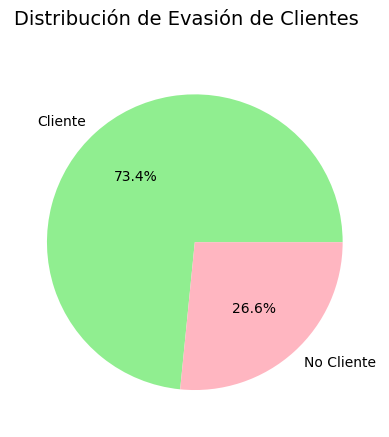

In [70]:
churn_counts = df['Churn'].value_counts()

fig, ax = plt.subplots()
ax.pie(churn_counts, labels=['Cliente', 'No Cliente'],colors=['lightgreen','lightpink'],autopct='%1.1f%%')
fig.suptitle('Distribución de Evasión de Clientes', fontsize=14)

plt.show()

### **Recuento de evasión por variables categóricas**

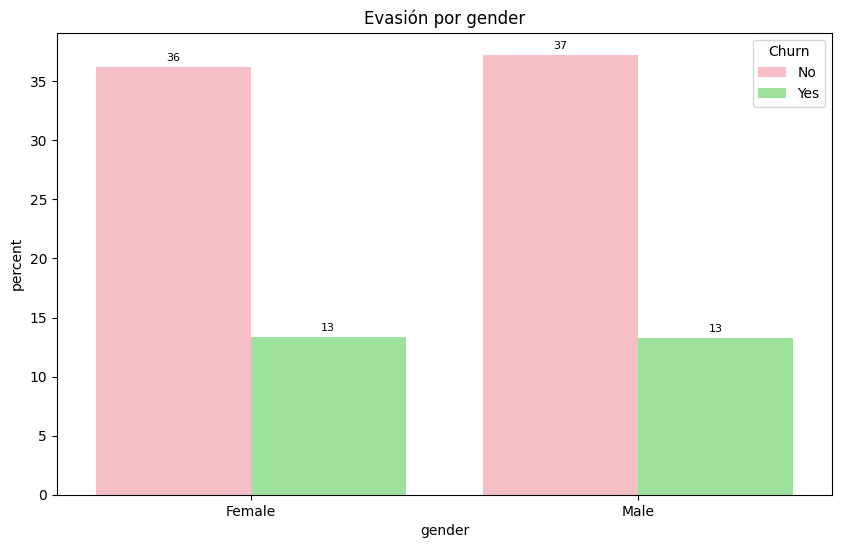

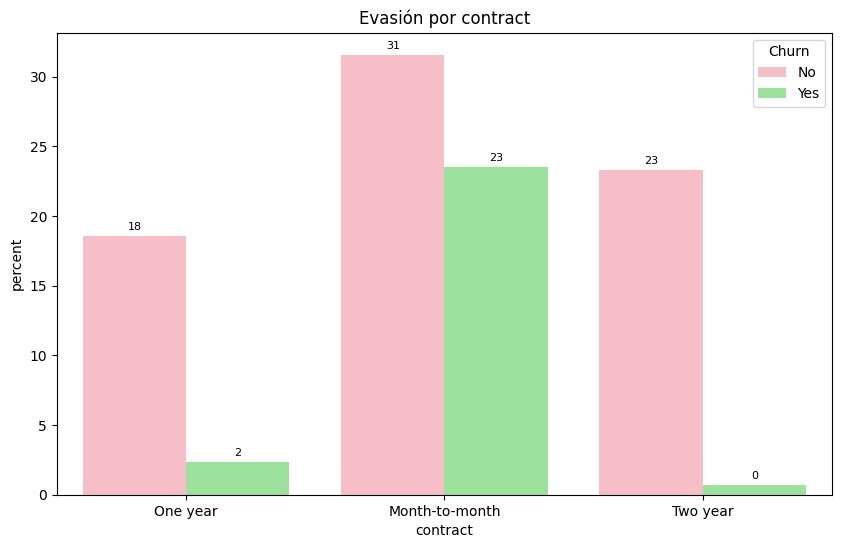

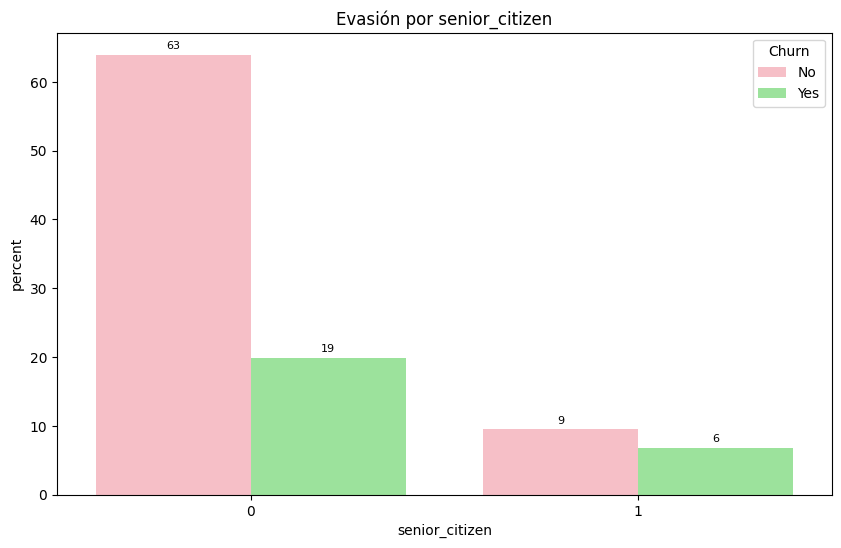

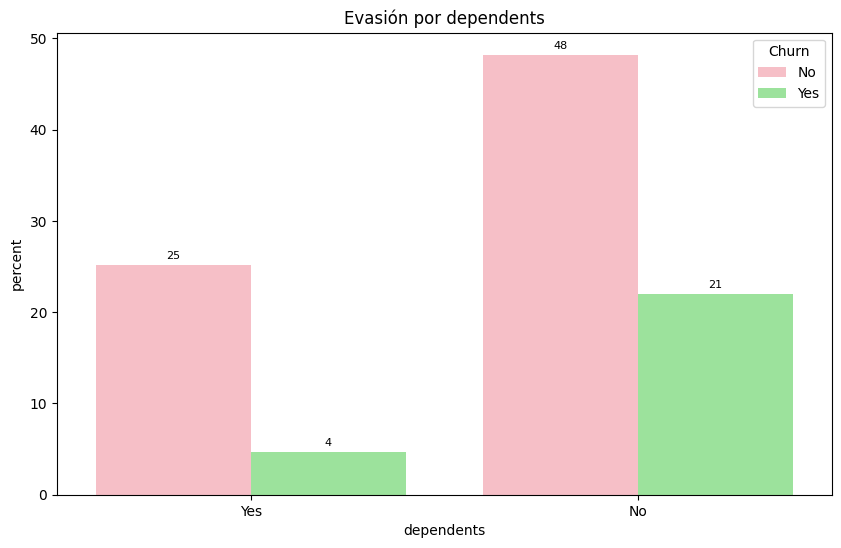

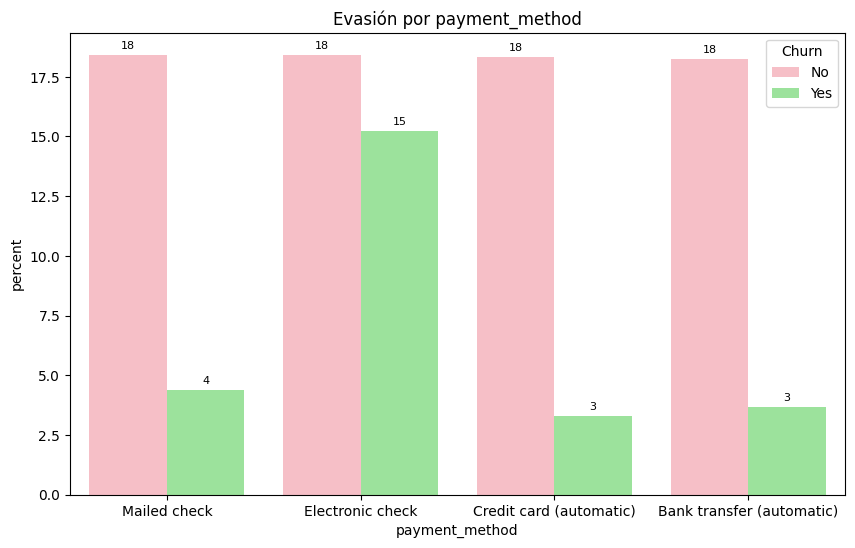

In [71]:
from matplotlib import colors
variables_categoricas = ['gender','contract','senior_citizen','dependents','payment_method']

for var in variables_categoricas:
  plt.figure(figsize=(10,6))
  ax = sns.countplot(x=var, hue='Churn', data=df, palette=['lightpink','lightgreen'],stat='percent')
  plt.title(f'Evasión por {var}')

  for container in ax.containers:
    ax.bar_label(container, fmt='%d', fontsize=8, padding=3)

  plt.show()

### **Conteo de evasión por variables numéricas**

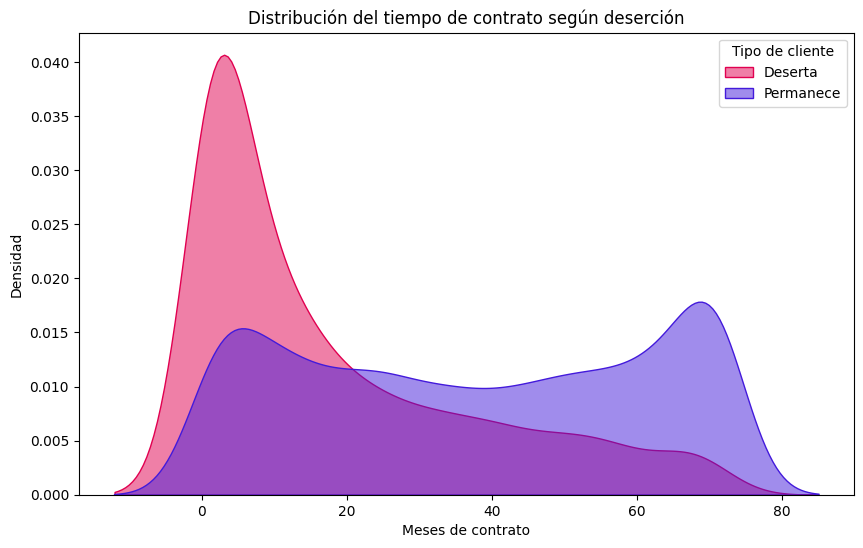

In [72]:
plt.figure(figsize=(10,6))

sns.kdeplot(data=df, x='tenure', hue='Churn', fill=True, common_norm=False, palette={'#431ADB', '#E10050'}, alpha=0.5)
plt.title('Distribución del tiempo de contrato según deserción')
plt.xlabel('Meses de contrato')
plt.ylabel('Densidad')
plt.legend(title='Tipo de cliente', labels=['Deserta','Permanece'])
plt.show()

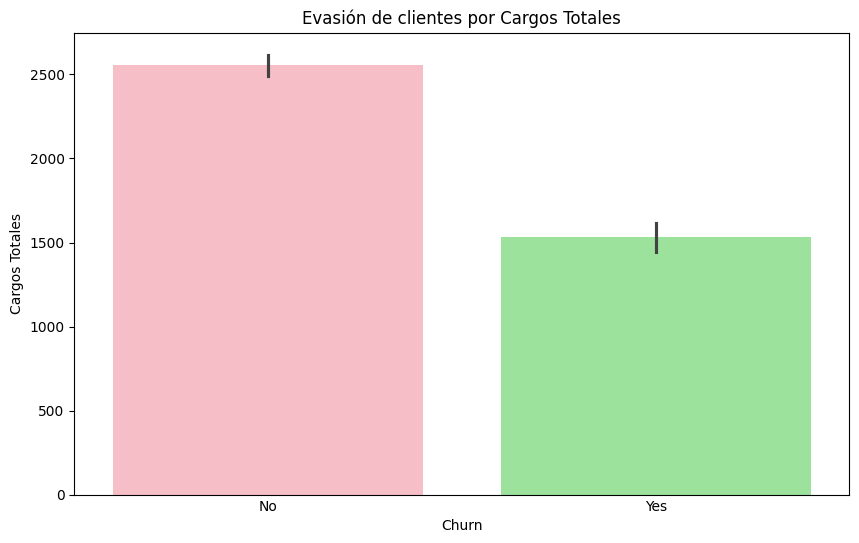

In [73]:
fig, ax = plt.subplots(figsize=(10,6))

ax = sns.barplot(data=df,x='Churn',y='charges_total',hue='Churn',orient='v', palette={'lightpink','lightgreen'})
ax.set_title('Evasión de clientes por Cargos Totales')
ax.set_xlabel('Churn')
ax.set_ylabel('Cargos Totales')
ax.tick_params(axis='x', which='both', length=0, width=0)

plt.show()

## 📝 **Informe final**

###**Telecom X - Análisis de Evasión de Clientes**

Frente a la verificación de los factores que llevan a la pérdida de clientes en la empresa **Telecom X**, se logró recopilar, procesar y analizar los datos obteniendo los siguientes resultados que resaltan en este estudio:

* La _**tasa de abandono**_ de clientes es un total de **26.6%**, lo cual representa un aproximado de la cuarta parte de la totalidad de su base de clientes.

En las variables categóricas y numéricas se realizó un análisis entre el género, tipo de contrato, ciudadado mayor, dependientes, método de pago, lo cual encontramos lo siguiente:

* Esta diferencia en realidad es mínima ya que representa una deserción similar (≈26%), lo cual nos indica que no es una variable determinante.
* El _**tipo de contrato mes a mes**_ representa la tasa de deserción más alta teniendo un **23%** de los abandonos de los clientes.
* La deserción en adultos +65 años es del 6% frente a adultos menores de 65 años que representa el 19%.
* Las personas que no son dependientes tienen una tasa de abandono del 21%
* El _**método de pago como el cheque electrónico**_ reprensentan la mayor deserción con un **15%**

#### **Recomendaciones**
* Aumentar los contratos a largo plazo
* Promover métodos de pago automáticos